In [1]:
import matplotlib.pyplot as plt
import numpy as np


class NN():
    def __init__(self, input_shape, hidden_shape, output_shape, batch_size, epoch_max, lr, error):
        #         parameter
        # input_shape  输入数据的维度
        # hidden_shape 隐层结点数
        # output_shaoe  类别数
        # batch_size batch大小，需要能够被样本数整除
        # epoch_max 迭代最大次数
        # lr 学习率
        # error loss小于一定数值终止train过程

        self.input_shape = input_shape
        self.hidden_shape = hidden_shape
        self.output_shape = output_shape
        self.batch_size = batch_size
        self.epoch_max = epoch_max
        self.lr = lr
        self.error = error
        self.w1 = (np.random.rand(self.input_shape, self.hidden_shape) - 0.5) / 10  # 所有的权重和偏执初始化为-0.05~0.05
        self.b1 = (np.random.rand(1, self.hidden_shape) - 0.5) / 10
        self.w2 = (np.random.rand(self.hidden_shape, self.output_shape) - 0.5) / 10
        self.b2 = (np.random.rand(1, self.output_shape) - 0.5) / 10
        self.loss = np.zeros(epoch_max)
        self.loss_history = []

    def sigmoid(self, x):
        #         parameter
        # x  n*p numpy array

        # sigmoid函数
        return 1 / (1 + np.exp(-x))

    def Dsigmoid(self, x):
        #         parameter
        # x  n*p numpy array

        # sigmoid导函数
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def Dtanh(self, x):
        #         parameter
        # x  n*p numpy array

        # 双曲正切函数的导函数
        return 1 - np.square(np.tanh(x))

    def train(self, x, t, print_flag):
        #         parameter
        # x  n*d numpy array
        # t  经过one-hot编码的标签，n*c numpy array
        # print_flag  Ture or False，用于标记是否打印log

        # deep copy
        x1 = x.copy()
        for epoch in range(self.epoch_max):

            loss_epoch = 0
            for m in range(int(x1.shape[0] / self.batch_size)):
                # 前向过程
                net1 = np.dot(x1[m * self.batch_size:(m + 1) * self.batch_size, :], self.w1)  # 计算 net1

                y = np.tanh(net1 + self.b1)  # 激活

                net2 = np.dot(y, self.w2)  # 计算net2

                z = self.sigmoid(net2 + self.b2)  # 激活

                loss_epoch += 0.5 * np.sum(np.square(t[m * self.batch_size:(m + 1) * self.batch_size, :] - z))  # loss

                self.loss_history.append(
                    0.5 * np.sum(np.square(t[m * self.batch_size:(m + 1) * self.batch_size, :] - z)))
                # print('epoch:', epoch + 1, ' batch:', m + 1, ' loss:', loss)

                # 反向过程
                dw2 = self.lr * np.dot(y.T, self.Dsigmoid(net2 + self.b2) * (
                        t[m * self.batch_size:(m + 1) * self.batch_size, :] - z))
                db2 = self.lr * self.Dsigmoid(net2 + self.b2) * (
                        t[m * self.batch_size:(m + 1) * self.batch_size, :] - z)
                dw1 = self.lr * np.dot(x1[m * self.batch_size:(m + 1) * self.batch_size, :].T,
                                       self.Dtanh(net1 + self.b1) * (np.dot(self.Dsigmoid(net2 + self.b2) * (
                                               t[m * self.batch_size:(m + 1) * self.batch_size, :] - z),
                                                                            self.w2.T)))
                db1 = self.lr * self.Dtanh(net1 + self.b1) * (
                    np.dot(self.Dsigmoid(net2 + self.b2) * (t[m * self.batch_size:(m + 1) * self.batch_size, :] - z),
                           self.w2.T))  # 计算出dw1 dw2 db1 db2
                self.w2 = self.w2 + dw2
                self.b2 = self.b2 + db2
                self.w1 = self.w1 + dw1
                self.b1 = self.b1 + db1  # 梯度下降
            if print_flag: print('epoch:', epoch, ' loss_avg:', loss_epoch)
            self.loss[epoch] = loss_epoch

    def embedding(self, x, layer):
        #         parameter
        # x  n*d numpy array
        # layer 'hidden' 或 'output'，用于标记获得哪一层经过激活函数后的数据

        net1 = np.dot(x, self.w1)

        y = np.tanh(net1 + self.b1)  # batch_size*h

        net2 = np.dot(y, self.w2)

        z = self.sigmoid(net2 + self.b2)

        if (layer == 'hidden'):
            return y

        if (layer == 'output'):
            return z

    def predict(self, x):
        #         parameter
        # x  n*p numpy array

        z = self.embedding(x, 'output')

        return np.argmax(z, axis=1)

    def acc(self, x, y):
        #         parameter
        # x  n*p numpy array
        # y  经过one-hot编码的标签，n*c numpy array

        y_p = self.predict(x)

        y = np.argmax(y, axis=1)

        return np.sum((y == y_p).astype(np.int)) * 1.0 / y.shape[0]


E:\anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
x1 = np.array([[1.58, 2.32, 5.8],
               [0.67, 1.58, 4.78],
               [1.04, 1.01, 3.63],
               [1.49, 2.18, 3.39],
               [0.41, 1.21, 4.73],
               [1.39, 3.16, 2.87],
               [1.20, 1.40, 1.89],
               [0.92, 1.44, 3.22],
               [0.45, 1.33, 4.38],
               [0.76, 0.84, 1.96]])

x2 = np.array([[0.21, 0.03, 2.21],
               [0.37, 0.28, 1.8],
               [0.18, 1.22, 0.16],
               [0.24, 0.93, 1.01],
               [1.18, 0.39, 0.39],
               [0.74, 0.96, 1.16],
               [0.38, 1.94, 0.48],
               [0.02, 0.72, 0.17],
               [0.44, 1.31, 0.14],
               [0.46, 1.49, 0.68]])

x3 = np.array([[1.54, 1.17, 0.64],
               [5.41, 3.45, 1.33],
               [1.55, 0.99, 2.69],
               [1.86, 3.19, 1.51],
               [1.68, 1.79, 0.87],
               [3.51, 0.22, 1.39],
               [1.40, 0.44, 0.92],
               [0.44, 0.83, 1.97],
               [0.25, 0.68, 0.99],
               [0.66, 0.45, 0.08]])

x = np.vstack((x1, x2, x3))
mu = np.average(x)
sigma = np.std(x)
x = (x - mu) / sigma  # 归一化

y = np.zeros((30, 3))
for i in range(3):
    for j in range(10):
        y[10 * i + j][i] = 1

E:\anaconda\lib\site-packages\ipykernel_launcher.py:133: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


5_1: 1.0
10_1: 1.0
20_1: 1.0
40_1: 1.0
80_1: 0.9333333333333333
160_1: 0.8666666666666667


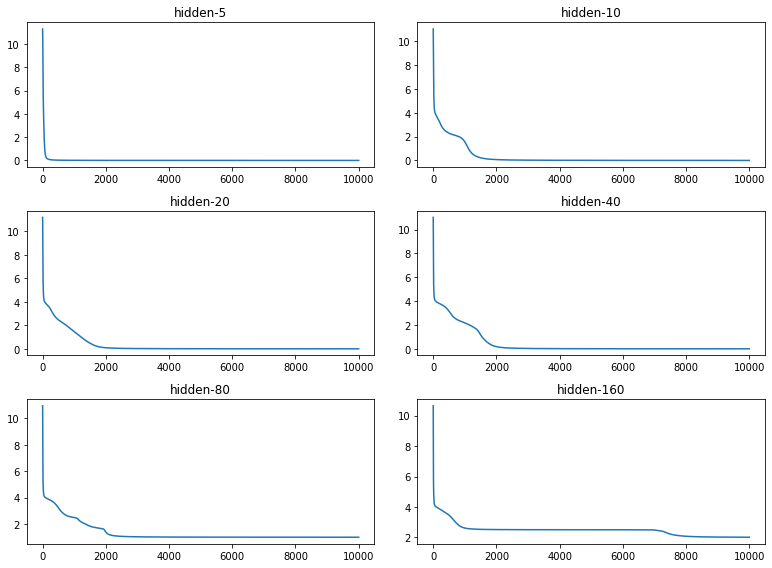

In [3]:
##########################assignment a#########################
##############################################################
##########################隐层节点数不同的影响###################

# 隐层结点设置为5，10，20，40，80，160
# lr=0.1
# epoch_max=10000
# batch_size = 1,30
#####################batch_size=1############################

BP5_1 = NN(3, 5, 3, 30, 10000, 0.1, 0.01)
BP5_1.train(x, y, False)
BP10_1 = NN(3, 10, 3, 1, 10000, 0.1, 0.01)
BP10_1.train(x, y, False)
BP20_1 = NN(3, 20, 3, 1, 10000, 0.1, 0.01)
BP20_1.train(x, y, False)
BP40_1 = NN(3, 40, 3, 1, 10000, 0.1, 0.01)
BP40_1.train(x, y, False)
BP80_1 = NN(3, 80, 3, 1, 10000, 0.1, 0.01)
BP80_1.train(x, y, False)
BP160_1 = NN(3, 160, 3, 1, 10000, 0.1, 0.01)
BP160_1.train(x, y, False)

print('5_1:', BP5_1.acc(x, y))
print('10_1:', BP10_1.acc(x, y))
print('20_1:', BP20_1.acc(x, y))
print('40_1:', BP40_1.acc(x, y))
print('80_1:', BP80_1.acc(x, y))
print('160_1:', BP160_1.acc(x, y))

####################plot###########################

x_line = np.linspace(1, 10000, num=10000, endpoint=True)
f, ax = plt.subplots(3, 2, figsize=(11, 8))
ax[0][0].plot(x_line, BP5_1.loss)
ax[0][0].set_title('hidden-5')
ax[0][1].plot(x_line, BP10_1.loss)
ax[0][1].set_title('hidden-10')
ax[1][0].plot(x_line, BP20_1.loss)
ax[1][0].set_title('hidden-20')
ax[1][1].plot(x_line, BP40_1.loss)
ax[1][1].set_title('hidden-40')
ax[2][0].plot(x_line, BP80_1.loss)
ax[2][0].set_title('hidden-80')
ax[2][1].plot(x_line, BP160_1.loss)
ax[2][1].set_title('hidden-160')
plt.tight_layout()
plt.savefig('batch_size_1.png')
plt.show()


E:\anaconda\lib\site-packages\ipykernel_launcher.py:133: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


5_30: 1.0
10_30: 1.0
20_30: 1.0
40_30: 1.0
80_30: 1.0
160_30: 1.0


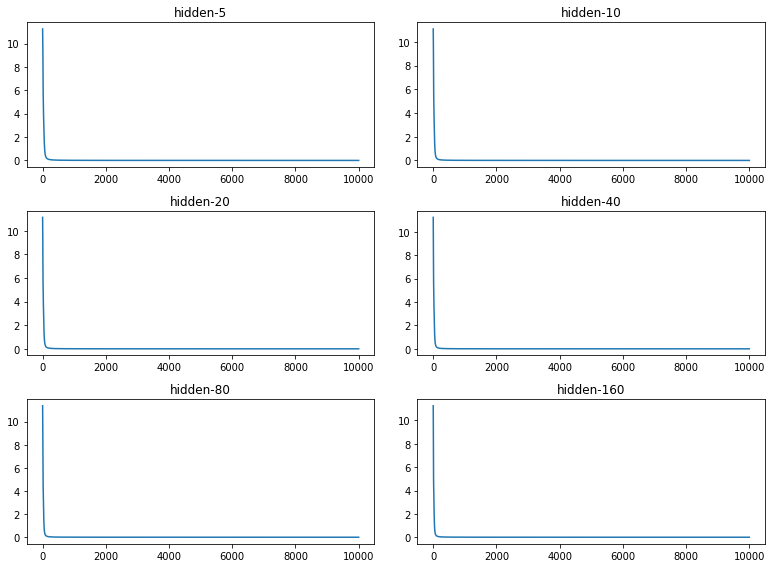

In [4]:
####################batch_size=30#########################

BP5_30 = NN(3, 5, 3, 30, 10000, 0.1, 0.01)
BP5_30.train(x, y, False)
BP10_30 = NN(3, 10, 3, 30, 10000, 0.1, 0.01)
BP10_30.train(x, y, False)
BP20_30 = NN(3, 20, 3, 30, 10000, 0.1, 0.01)
BP20_30.train(x, y, False)
BP40_30 = NN(3, 40, 3, 30, 10000, 0.1, 0.01)
BP40_30.train(x, y, False)
BP80_30 = NN(3, 80, 3, 30, 10000, 0.1, 0.01)
BP80_30.train(x, y, False)
BP160_30 = NN(3, 160, 3, 30, 10000, 0.1, 0.01)
BP160_30.train(x, y, False)

print('5_30:', BP5_30.acc(x, y))
print('10_30:', BP10_30.acc(x, y))
print('20_30:', BP20_30.acc(x, y))
print('40_30:', BP40_30.acc(x, y))
print('80_30:', BP80_30.acc(x, y))
print('160_30:', BP160_30.acc(x, y))

####################plot###########################

f, ax = plt.subplots(3, 2, figsize=(11, 8))
ax[0][0].plot(x_line, BP5_30.loss)
ax[0][0].set_title('hidden-5')
ax[0][1].plot(x_line, BP10_30.loss)
ax[0][1].set_title('hidden-10')
ax[1][0].plot(x_line, BP20_30.loss)
ax[1][0].set_title('hidden-20')
ax[1][1].plot(x_line, BP40_30.loss)
ax[1][1].set_title('hidden-40')
ax[2][0].plot(x_line, BP80_30.loss)
ax[2][0].set_title('hidden-80')
ax[2][1].plot(x_line, BP160_30.loss)
ax[2][1].set_title('hidden-160')
plt.tight_layout()
plt.savefig('batch_size_30.png')
plt.show()

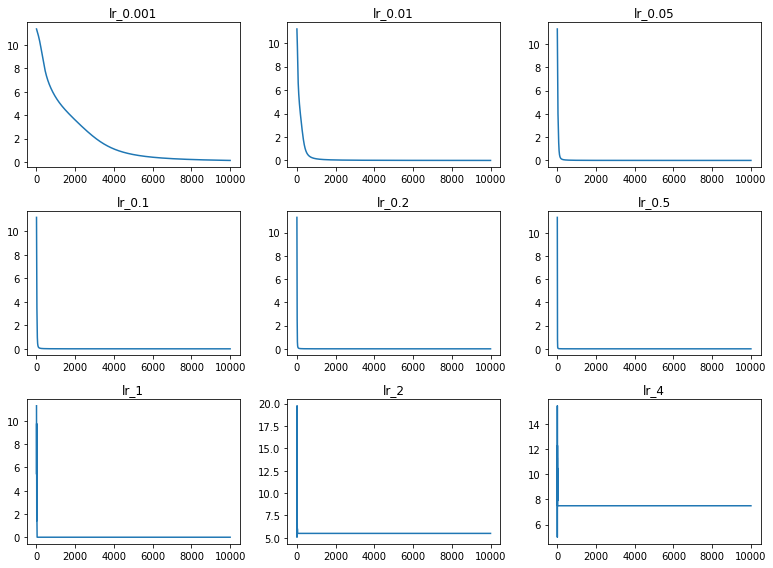

In [5]:
##########################assignment b#########################
##############################################################
##########################lr的影响###################

##epoch=10000
##hidden_nodes=80
##batch_size=30
##lr=0.001,0.01,0.05,0.1,0.2,0.5,1,2,4

BP_21 = NN(3, 80, 3, 30, 10000, 0.001, 0.01)
BP_22 = NN(3, 80, 3, 30, 10000, 0.01, 0.01)
BP_23 = NN(3, 80, 3, 30, 10000, 0.05, 0.01)
BP_24 = NN(3, 80, 3, 30, 10000, 0.1, 0.01)
BP_25 = NN(3, 80, 3, 30, 10000, 0.2, 0.01)
BP_26 = NN(3, 80, 3, 30, 10000, 0.5, 0.01)
BP_27 = NN(3, 80, 3, 30, 10000, 1, 0.01)
BP_28 = NN(3, 80, 3, 30, 10000, 2, 0.01)
BP_29 = NN(3, 80, 3, 30, 10000, 4, 0.01)
BP_21.train(x, y, False)
BP_22.train(x, y, False)
BP_23.train(x, y, False)
BP_24.train(x, y, False)
BP_25.train(x, y, False)
BP_26.train(x, y, False)
BP_27.train(x, y, False)
BP_28.train(x, y, False)
BP_29.train(x, y, False)

f, ax = plt.subplots(3, 3, figsize=(11, 8))
ax[0][0].plot(x_line, BP_21.loss)
ax[0][0].set_title('lr_0.001')
ax[0][1].plot(x_line, BP_22.loss)
ax[0][1].set_title('lr_0.01')
ax[0][2].plot(x_line, BP_23.loss)
ax[0][2].set_title('lr_0.05')
ax[1][0].plot(x_line, BP_24.loss)
ax[1][0].set_title('lr_0.1')
ax[1][1].plot(x_line, BP_25.loss)
ax[1][1].set_title('lr_0.2')
ax[1][2].plot(x_line, BP_26.loss)
ax[1][2].set_title('lr_0.5')
ax[2][0].plot(x_line, BP_27.loss)
ax[2][0].set_title('lr_1')
ax[2][1].plot(x_line, BP_28.loss)
ax[2][1].set_title('lr_2')
ax[2][2].plot(x_line, BP_29.loss)
ax[2][2].set_title('lr_4')
plt.tight_layout()
plt.savefig('diff_lr_batch_30.png')
plt.show()


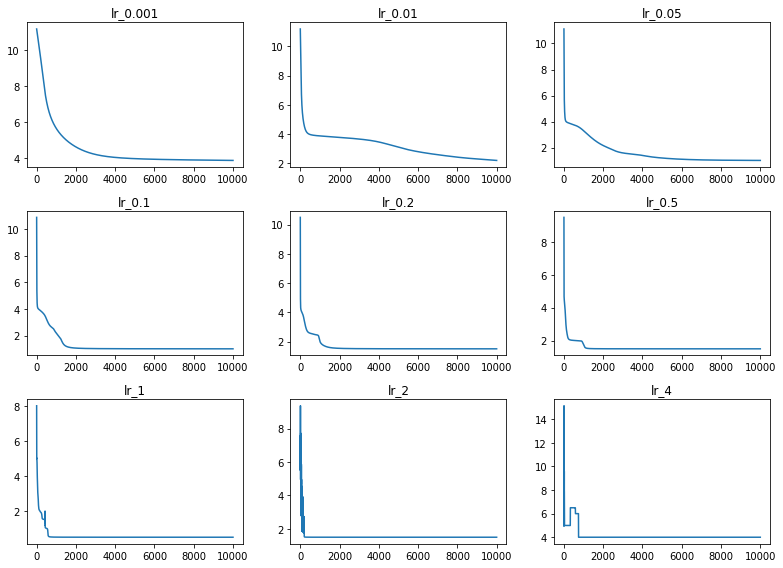

In [6]:
##epoch=10000
##hidden_nodes=80
##batch_size=1
##lr=0.001,0.01,0.05,0.1,0.2,0.5,1,2,4
BP_21 = NN(3, 80, 3, 1, 10000, 0.001, 0.01)
BP_22 = NN(3, 80, 3, 1, 10000, 0.01, 0.01)
BP_23 = NN(3, 80, 3, 1, 10000, 0.05, 0.01)
BP_24 = NN(3, 80, 3, 1, 10000, 0.1, 0.01)
BP_25 = NN(3, 80, 3, 1, 10000, 0.2, 0.01)
BP_26 = NN(3, 80, 3, 1, 10000, 0.5, 0.01)
BP_27 = NN(3, 80, 3, 1, 10000, 1, 0.01)
BP_28 = NN(3, 80, 3, 1, 10000, 2, 0.01)
BP_29 = NN(3, 80, 3, 1, 10000, 4, 0.01)
BP_21.train(x, y, False)
BP_22.train(x, y, False)
BP_23.train(x, y, False)
BP_24.train(x, y, False)
BP_25.train(x, y, False)
BP_26.train(x, y, False)
BP_27.train(x, y, False)
BP_28.train(x, y, False)
BP_29.train(x, y, False)

f, ax = plt.subplots(3, 3, figsize=(11, 8))
ax[0][0].plot(x_line, BP_21.loss)
ax[0][0].set_title('lr_0.001')
ax[0][1].plot(x_line, BP_22.loss)
ax[0][1].set_title('lr_0.01')
ax[0][2].plot(x_line, BP_23.loss)
ax[0][2].set_title('lr_0.05')
ax[1][0].plot(x_line, BP_24.loss)
ax[1][0].set_title('lr_0.1')
ax[1][1].plot(x_line, BP_25.loss)
ax[1][1].set_title('lr_0.2')
ax[1][2].plot(x_line, BP_26.loss)
ax[1][2].set_title('lr_0.5')
ax[2][0].plot(x_line, BP_27.loss)
ax[2][0].set_title('lr_1')
ax[2][1].plot(x_line, BP_28.loss)
ax[2][1].set_title('lr_2')
ax[2][2].plot(x_line, BP_29.loss)
ax[2][2].set_title('lr_4')
plt.tight_layout()
plt.savefig('diff_lr_batch_1.png')
plt.show()

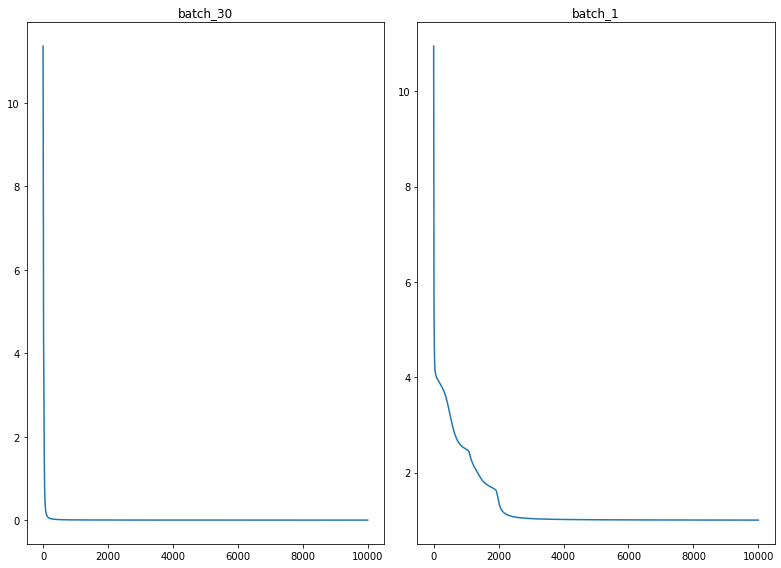

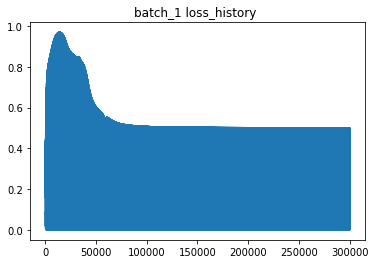

In [7]:
##########################assignment c#########################
##############################################################
##########################epoch的影响###################
##epoch=10000
##hidden_nodes=80
##batch_size=1,30
##lr=0.1
f, ax = plt.subplots(1, 2, figsize=(11, 8))
ax[0].plot(x_line, BP80_30.loss)
ax[0].set_title('batch_30')
ax[1].plot(x_line, BP80_1.loss)
ax[1].set_title('batch_1')
plt.tight_layout()
plt.savefig('epoch.png')
plt.show()

plt.plot(np.linspace(1, len(BP80_1.loss_history), num=len(BP80_1.loss_history), endpoint=True), BP80_1.loss_history)
plt.title('batch_1 loss_history ')
plt.savefig('batch_1_loss_history.png')
plt.show()